# Importing modules

Let's first add these libraries to our project:

`numpy`: for matrix operations

`tensorlfow`: deep learning layers

`maplotlitb`: visualization

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import h5py as h5
from tensorflow.python.framework import ops
from os import path
import os

# Steps for solving the problem

<ol>
    <li>Read data and format it.</li>
    <li>Use sliding window approach to augment data.</li>
    <li>Split data into training/dev/test sets.</li>
    <li>Create procedure for randomly initializing parameters with specified shape using Xavier's initialization.</li>
    <li>Create convolution and pooling procedures.</li>
    <li>Implement forward propagation.</li>
    <li>Implement cost function.</li>
    <li>Create model (uses Adam optimizer for minimization).</li>
    <li>Train model.</li>
    <li>Hyperparameter tuning using cross-validation sets.</li>
    <li>Retrain model until higher accuracy is achevied.</li>
</ol>

# Reading data

The sets in the dataset are divided into five categories.


SET A:	Z directory with	Z000.txt - Z100.txt<br>
SET B: 	O directory with	O000.txt - O100.txt<br>
SET C:	N directory with	N000.txt - N100.txt<br>
SET D:	F directory	with	F000.txt - F100.txt<br>
SET E:	S directory with	S000.txt - S100.txt<br>

In [2]:
dataset_relative_path = 'dataset/random-iter-3/'

datafile = dataset_relative_path + 'datafile1024.h5'

with h5.File(datafile, 'r') as datafile:
    X_train = np.array(datafile['X_train'])
    Y_train = np.array(datafile['Y_train'])
    
    X_dev = np.array(datafile['X_dev'])
    Y_dev = np.array(datafile['Y_dev'])
    
    X_test = np.array(datafile['X_test'])
    Y_test = np.array(datafile['Y_test'])

In [3]:
def make_dimensions_compatible(arr):
    
    return arr.reshape(arr.shape[0],-1,1)

In [4]:
X_train = make_dimensions_compatible(X_train)
X_dev = make_dimensions_compatible(X_dev)
X_test = make_dimensions_compatible(X_test)

In [5]:
print(X_train.shape)
print(Y_train.shape)

(11250, 1024, 1)
(11250, 3)


In [6]:
X_train = X_train / 1000
X_dev = X_dev / 1000
X_test = X_test / 1000

# Initialization

WRITE TEXT HERE...

In [7]:
def initialize_parameters(parameter_shapes, parameter_values = {}):
    """
    Initializes weight parameters to build a neural network with tensorflow using Xaviar's initialization.
    The parameters are:
    parameter_shapes: a dictionary where keys represent tensorflow variable names, and values
    are shapes of the parameters in a list format
    Returns:
    params -- a dictionary of tensors containing parameters
    """
    
    params = { }
    
    for n,s in parameter_shapes.items():
        param = tf.get_variable(n, s, initializer = tf.contrib.layers.xavier_initializer())
        params[n] = param
    
    for n,v in parameter_values.items():
        params[n] = v
    
    return params

# Forward Propagation

WRITE TEXT HERE...

In [39]:
def forward_propagation_cnn1(X, parameters, training=False):
    """
    Implements the forward propagation for the model:
    (CONV BN RELU) -> (CONV BN RELU) -> (CONV BN RELU) -> (FC RELU DROPOUT) -> FC
    
    Arguments:
    X -- input dataset placeholder, of shape (input size, number of examples)
    parameters -- python dictionary containing your parameters
                  "CONV1_W", "CONV2_W", "CONV3_W", "FC1_units", "DO_prob", "output_classes"
                  the shapes are given in initialize_parameters

    Returns:
    Z3 -- the output of the last LINEAR unit (without softmax)
    """
    
    # Retrieve the parameters from the dictionary "parameters" 
    CONV1_W = parameters['CONV1_W']
    CONV1_Str = parameters['CONV1_Str']
    CONV2_W = parameters['CONV2_W']
    CONV2_Str = parameters['CONV2_Str']
    CONV3_W = parameters['CONV3_W']
    CONV3_Str = parameters['CONV3_Str']
    FC1_units = parameters['FC1_units']
    DO_prob = parameters['DO_prob']
    output_classes = parameters["output_classes"]
    
    
    #Layer 1
    # CONV
    Z1 = tf.nn.conv1d(X, CONV1_W, stride=CONV1_Str, padding='VALID', data_format='NWC', name='conv1')
    # Batch Normalization
    B1 = tf.contrib.layers.batch_norm(Z1, is_training=training, updates_collections=None)
    # RELU
    A1 = tf.nn.relu(B1)
    
    #Layer 2
    # CONV
    Z2 = tf.nn.conv1d(A1, CONV2_W, stride=CONV2_Str, padding='VALID', data_format='NWC', name='conv2')
    # Batch Normalization
    B2 = tf.contrib.layers.batch_norm(Z2, is_training=training, updates_collections=None)
    # RELU
    A2 = tf.nn.relu(B2)
    
    #Layer 3
    # CONV
    Z3 = tf.nn.conv1d(A2, CONV3_W, stride=CONV3_Str, padding='VALID', data_format='NWC', name='conv3')
    # Batch Normalization
    B3 = tf.contrib.layers.batch_norm(Z3, is_training=training, updates_collections=None)
    # RELU
    A3 = tf.nn.relu(B3)
    
    # Flatten activations for FC layer
    A3_flat = tf.contrib.layers.flatten(A3)
    
    # Layer 4
    # FC
    A4 = tf.contrib.layers.fully_connected(A3_flat, FC1_units, activation_fn=tf.nn.relu)
    # Dropout
    A4_dropped = tf.contrib.layers.dropout(A4, keep_prob=DO_prob, is_training=training)
    
    # Layer 5
    # FC
    logits = tf.contrib.layers.fully_connected(A4_dropped, output_classes, activation_fn=None)
    
    # Although the cost function we use will have in-built softmax computations,
    # for predictions it'll be feasible to have a named tensor
    softmax_output = tf.nn.softmax(logits, name='softmax_output')
    
    return logits, softmax_output
    

In [40]:
def forward_propagation_cnn3(X, parameters, training=False):
    """
    Implements the forward propagation for the model:
    (CONV BN RELU) -> (CONV BN RELU DROPOUT) -> (CONV BN RELU) -> (FC RELU DROPOUT) -> FC
    
    Arguments:
    X -- input dataset placeholder, of shape (input size, number of examples)
    parameters -- python dictionary containing your parameters
                  "CONV1_W", "CONV2_W", "CONV3_W", "FC1_units", "DO_prob", "output_classes"
                  the shapes are given in initialize_parameters

    Returns:
    Z3 -- the output of the last LINEAR unit (without softmax)
    """
    
    # Retrieve the parameters from the dictionary "parameters" 
    CONV1_W = parameters['CONV1_W']
    CONV1_Str = parameters['CONV1_Str']
    CONV2_W = parameters['CONV2_W']
    CONV2_Str = parameters['CONV2_Str']
    DO_prob_middle_layer = parameters['DO_prob_middle_layer']
    CONV3_W = parameters['CONV3_W']
    CONV3_Str = parameters['CONV3_Str']
    FC1_units = parameters['FC1_units']
    DO_prob = parameters['DO_prob']
    output_classes = parameters["output_classes"]
    
    
    #Layer 1
    # CONV
    Z1 = tf.nn.conv1d(X, CONV1_W, stride=CONV1_Str, padding='VALID', data_format='NWC', name='conv1')
    # Batch Normalization
    B1 = tf.contrib.layers.batch_norm(Z1, is_training=training, updates_collections=None)
    # RELU
    A1 = tf.nn.relu(B1)
    
    #Layer 2
    # CONV
    Z2 = tf.nn.conv1d(A1, CONV2_W, stride=CONV2_Str, padding='VALID', data_format='NWC', name='conv2')
    # Batch Normalization
    B2 = tf.contrib.layers.batch_norm(Z2, is_training=training, updates_collections=None)
    # RELU
    A2 = tf.nn.relu(B2)
    # Dropout
    A2_dropped = tf.contrib.layers.dropout(A2, keep_prob=DO_prob_middle_layer, is_training=training)
    
    #Layer 3
    # CONV
    Z3 = tf.nn.conv1d(A2_dropped, CONV3_W, stride=CONV3_Str, padding='VALID', data_format='NWC', name='conv3')
    # Batch Normalization
    B3 = tf.contrib.layers.batch_norm(Z3, is_training=training, updates_collections=None)
    # RELU
    A3 = tf.nn.relu(B3)
    
    # Flatten activations for FC layer
    A3_flat = tf.contrib.layers.flatten(A3)
    
    # Layer 4
    # FC
    A4 = tf.contrib.layers.fully_connected(A3_flat, FC1_units, activation_fn=tf.nn.relu)
    # Dropout
    A4_dropped = tf.contrib.layers.dropout(A4, keep_prob=DO_prob, is_training=training)
    
    # Layer 5
    # FC
    logits = tf.contrib.layers.fully_connected(A4_dropped, output_classes, activation_fn=None)
    
    # Although the cost function we use will have in-built softmax computations,
    # for predictions it'll be feasible to have a named tensor
    softmax_output = tf.nn.softmax(logits, name='softmax_output')
    
    return logits, softmax_output

# Computing cost function

WRITE TEXT HERE...

In [57]:
def compute_cost(X, Y, parameters, nn_key, training):
    
    """
    Apply softmax to the output classes and find cross entropy loss
    X - Input data
    Y - One-hot output class training labels
    
    Returns:
    cost - cross entropy loss
    """
    
    # FIXME: setting training=training causes problems during evaluation time
    if nn_key == 'cnn1':
        logits, Y_hat = forward_propagation_cnn1(X, parameters, training=training)
    elif nn_key == 'cnn2':
        logits, Y_hat = forward_propagation_cnn1(X, parameters, training=training)
    elif nn_key == 'cnn3':
        logits, Y_hat = forward_propagation_cnn3(X, parameters, training=training)
    elif nn_key == 'cnn4':
        logits, Y_hat = forward_propagation_cnn3(X, parameters, training=training)
    elif nn_key == 'cnn5':
        logits, Y_hat = forward_propagation_cnn3(X, parameters, training=training)
    elif nn_key == 'cnn6':
        logits, Y_hat = forward_propagation_cnn1(X, parameters, training=training)
    elif nn_key == 'cnn7':
        logits, Y_hat = forward_propagation_cnn1(X, parameters, training=training)
    else:
        KeyError('Provided nn_key doesn\'t match with any model')
    
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits, labels=Y))
    
    return cost, Y_hat

# Pre-requisites for training

Here are some procedures that are necessary to execute before the actual training.

### Create placeholders

Tensorflow functions take input in the form of `feed_dict`. The variables in other functions are placeholders for the actual input.

In [28]:
def create_placeholders(n_x, n_y):
    """
    Creates Tensorflow placeholders that act for input data and their labels
    
    Arguments:
    n_x - no. of features for X
    n_x - no. of classes for Y
    
    Returns:
    X - placeholder for data that contains input featurs,
        shape: (no. of examples, no. of features). No. of examples is set to None
    Y - placeholder for data that contains output class labels,
        shape (no. of examples, no. of classes). No. of examples is set ot None
    """
    
    X = tf.placeholder(tf.float32, name='X', shape=(None, n_x, 1))
    Y = tf.placeholder(tf.float32, name='Y', shape=(None, n_y))
    is_train = tf.placeholder(tf.bool, name='is_train')
    
    return X,Y,is_train

### Parameter shapes

To initialize model parameters, we've created a procedure above. It takes as an argument a dictionary in which we supply the model parameter shapes.

In [56]:
def parameter_shapes(nn_key):
    """
    Get tha shapes of all parameters used in the model.
    Convolutional layer parameter shapes (filters) are in list format
    
    Arguments:
    nn_key - Provide the key for the neural network model used
    could be, 'cnn1', 'cnn2'
    
    Returns:
    param_shapes - dict that contains all the parameters as follows
    CONV1_W, CONV2_W, CONV3_W
    param_values:
    CONV1_Str, CONV2_Str, CONV3_Str,
    FC1_units, DO_prob, output_classes
    """
    
    param_shapes = {}
    param_values = {}
    
    do_prob = {
        'cnn1': 0.5,
        'cnn2': 0.7,
        'cnn3': 0.7,
        'cnn4': 0.7,
        'cnn5': 0.7,
        'cnn6': 0.9,
        'cnn7': 0.9
    }
    
    do_prob_middle_layer = {
        'cnn1': 0, # not used
        'cnn2': 0, # not used
        'cnn3': 0.2,
        'cnn4': 0.05,
        'cnn5': 0.01,
        'cnn6': 0, # not used
        'cnn7': 0 # not used
    }
    
    fc1_units = {
        'cnn1': 20,
        'cnn2': 15,
        'cnn3': 15,
        'cnn4': 15,
        'cnn5': 15,
        'cnn6': 15,
        'cnn7': 10
    }

    # Conv Layer 1 parameter shapes
    # No. of channels: 24, Filter size: 5, Stride: 3
    param_shapes['CONV1_W'] = [5, 1, 24]
    param_values['CONV1_Str'] = 3
    
    # Conv Layer 2 parameter shapes
    # No. of channels: 16, Filter size: 3, Stride: 2
    param_shapes['CONV2_W'] = [3, 24, 16]
    param_values['CONV2_Str'] = 2
    
    # Dropout after the convolutional layer 2
    # Not used in some cases
    param_values['DO_prob_middle_layer'] = do_prob_middle_layer[nn_key]
    
    # Conv Layer 3 parameter shapes
    # No. of channels: 8, Filter size: 3, Stride: 2
    param_shapes['CONV3_W'] = [3, 16, 8]
    param_values['CONV3_Str'] = 2
    
    # Fully connected layer 1 units = 20
    param_values['FC1_units'] = fc1_units[nn_key]
    
    # Dropout layer after fully connected layer 1 probability
    param_values['DO_prob'] = do_prob[nn_key]
    
    # Fully connected layer 2 units (also last layer)
    # No. of units = no. of output classes = 3
    param_values['output_classes'] = 3
    
    return param_shapes, param_values

### Random mini-batches

For each epoch we'll use different sets of mini-batches to avoid any possible overfitting.

In [30]:
def random_mini_batches(X, Y, mini_batch_size = 64):
    """
    Creates a list of random minibatches from (X, Y)
    
    Arguments:
    X -- input data, of shape (number of examples, window size) (m, n_x)
    Y -- output classes, of shape (number of examples, output classes) (m, n_y)
    mini_batch_size - size of the mini-batches, integer
    Returns:
    mini_batches -- list of synchronous (mini_batch_X, mini_batch_Y)
    """
    
    m = X.shape[0]                  # number of training examples
    mini_batches = []
    
    # Step 1: Shuffle (X, Y)
    permutation = list(np.random.permutation(m))
    shuffled_X = X[permutation,:,:]
    shuffled_Y = Y[permutation,:]

    # Step 2: Partition (shuffled_X, shuffled_Y). Minus the end case.
    num_complete_minibatches = np.floor(m/mini_batch_size).astype(int) # number of mini batches of size mini_batch_size in your partitionning
    for k in range(0, num_complete_minibatches):
        mini_batch_X = shuffled_X[k * mini_batch_size : k * mini_batch_size + mini_batch_size,:,:]
        mini_batch_Y = shuffled_Y[k * mini_batch_size : k * mini_batch_size + mini_batch_size,:]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    # Handling the end case (last mini-batch < mini_batch_size)
    if m % mini_batch_size != 0:
        mini_batch_X = shuffled_X[num_complete_minibatches * mini_batch_size : m,:,:]
        mini_batch_Y = shuffled_Y[num_complete_minibatches * mini_batch_size : m,:]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    return mini_batches

### Plotting costs

WRITE TEXT HERE...

In [31]:
def plot_costs(costs, dev_costs, learning_rate, total_epochs):
    # plot the cost
    plt.plot(costs, color='blue', label='training')
    plt.plot(dev_costs, color='green', label='dev')
    plt.ylabel('cost')
    plt.xlabel('iterations')
    plt.title("Learning rate = %f\nTotal Epochs = %i" % (learning_rate, total_epochs))
    plt.legend()
    plt.show()

# Training data

WRITE TEXT HERE...

[UPDATE_OPS](https://www.tensorflow.org/api_docs/python/tf/contrib/layers/batch_norm)

In [58]:
def model(X_train, Y_train, X_dev, Y_dev,
          learning_rate = 0.009, num_epochs = 100, minibatch_size = 64, print_cost = True,
          save_session_path=None, model_file=None, restore_session=False, save_session_interval=5, max_to_keep=10,
          nn_key='cnn1'):
    """
    
    Arguments:
    X_train -- training set, of shape (None, 64, 64, 3)
    Y_train -- test set, of shape (None, n_y = 6)
    X_test -- training set, of shape (None, 64, 64, 3)
    Y_test -- test set, of shape (None, n_y = 6)
    learning_rate -- learning rate of the optimization
    num_epochs -- number of epochs of the optimization loop
    minibatch_size -- size of a minibatch
    print_cost -- True to print the cost every 100 epochs
    
    Returns:
    train_accuracy -- real number, accuracy on the train set (X_train)
    test_accuracy -- real number, testing accuracy on the test set (X_test)
    parameters -- parameters learnt by the model. They can then be used to predict.
    """
    
    ops.reset_default_graph()                         # to be able to rerun the model without overwriting tf variables
    (m, n_x,_) = X_train.shape             
    n_y = Y_train.shape[1]                            
    costs = []                                        # To keep track of the cost
    dev_costs = []
    
    model_path = None
    if (save_session_path != None and model_file != None):
        model_path = save_session_path + model_file
    
    
    # Create Placeholders of the correct shape
    X, Y, is_train = create_placeholders(n_x, n_y)

    # Initialize parameters
    param_shapes, param_values = parameter_shapes(nn_key)
    parameters = initialize_parameters(param_shapes, param_values)
    
    # Forward propagation: Build the forward propagation in the tensorflow graph
    # Prediction: Use Y_hat to compute the output class during prediction
    cost, Y_hat = compute_cost(X, Y, parameters, nn_key, is_train)
    
    # Backpropagation: Define the tensorflow optimizer. Use an AdamOptimizer that minimizes the cost.
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)
    # optimizer = tf.train.RMSPropOptimizer(learning_rate=learning_rate).minimize(cost)
    
    # For saving / restoring sesison when training for long
    epoch_counter = tf.get_variable('epoch_counter', shape=[], initializer=tf.zeros_initializer)
    counter_op = tf.assign_add(epoch_counter, 1)
    saver = tf.train.Saver(max_to_keep=max_to_keep)
    
    # Calculate the correct predictions
    predict_op = tf.argmax(Y_hat, 1)
    correct_prediction = tf.equal(predict_op, tf.argmax(Y, 1))

    # Calculate accuracy on the test set
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    
    # For impementation of batch norm the tf.GraphKeys.UPDATE_OPS dependency needs to be added
    # see documentation on tf.contrib.layers.batch_norm
#     update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
    
    # Initialize all the variables globally
    init = tf.global_variables_initializer()
     
    # Start the session to compute the tensorflow graph
    with tf.Session() as sess: #, tf.control_dependencies(update_ops):
        
        if (restore_session == False and path.exists(save_session_path)):
            raise FileExistsError('Session already exists, either restore the session, or manually delete the files.')
        
        # restore the previous session if the path already exists
        if (model_path != None and restore_session==True):
            print("Restoring session...\n")
            saver.restore(sess, model_path)
            print("Previous epoch counter: %i\n\n" % epoch_counter.eval())
        else:
            sess.run(init)
        
        tf.train.export_meta_graph(model_path + '.meta') # save the model file (.meta) only once
        
        print("Cost at start: %f" % cost.eval({X: X_train, Y: Y_train, is_train: False}))
        print("Dev cost: %f" % cost.eval({X: X_dev, Y: Y_dev, is_train: False}))
        
        train_accuracy = accuracy.eval({X: X_train, Y: Y_train, is_train: False})
        dev_accuracy = accuracy.eval({X: X_dev, Y: Y_dev, is_train: False})
        print("Train Accuracy:", train_accuracy)
        print("Dev Accuracy:", dev_accuracy)
        
        # Do the training loop
        for epoch in range(num_epochs):

            epoch_cost = 0.
            num_minibatches = int(m / minibatch_size) # number of minibatches of size minibatch_size in the train set
            minibatches = random_mini_batches(X_train, Y_train, minibatch_size)

            for minibatch in minibatches:
                
                try:

                    # Select a minibatch
                    (minibatch_X, minibatch_Y) = minibatch

                    # IMPORTANT: The line that runs the graph on a minibatch.
                    # Run the session to execute the optimizer and the cost, the feedict should contain a minibatch for (X,Y).
                    _,minibatch_cost = sess.run([optimizer, cost], feed_dict={X: minibatch_X, Y: minibatch_Y, is_train: True})

                    epoch_cost += minibatch_cost / num_minibatches
                
                # Implement early stopping mechanism on KeyboardInterrupt
                except KeyboardInterrupt:
                    print("KeyboardInterrupt received. Stopping early")
                    plot_costs(np.squeeze(costs), np.squeeze(dev_costs), learning_rate, epoch_counter.eval())
                    return parameters
                
            
            if (epoch % save_session_interval == 0 and save_session_path != None):
                saver.save(sess, model_path, write_meta_graph=False)
            
            # Save the costs after each epoch for plotting learning curve
            if print_cost == True and epoch % 1 == 0:
                costs.append(epoch_cost)
                dev_cost = cost.eval({X: X_dev, Y: Y_dev, is_train: False})
                dev_costs.append(dev_cost)
                
                
            # Print the cost every epoch
            if print_cost == True and (epoch + 1) % 5 == 0:
                print ("\nCost after epoch %i: %f" % (epoch + 1, epoch_cost))
                print ("Dev cost after epoch %i: %f" % (epoch + 1, dev_cost))
                
                train_accuracy = accuracy.eval({X: X_train, Y: Y_train, is_train: False})
                dev_accuracy = accuracy.eval({X: X_dev, Y: Y_dev, is_train: False})
                print("Train Accuracy:", train_accuracy)
                print("Dev Accuracy:", dev_accuracy)
            
            # increment the epoch_counter in case the session is saved
            # and restored later
            sess.run(counter_op)
                
                
        if (save_session_path != None):
            saver.save(sess, model_path, write_meta_graph=False)
        
        
        plot_costs(np.squeeze(costs), np.squeeze(dev_costs), learning_rate, epoch_counter.eval())

        # Calculate the correct predictions
        train_accuracy = accuracy.eval({X: X_train, Y: Y_train, is_train: False})
        dev_accuracy = accuracy.eval({X: X_dev, Y: Y_dev, is_train: False})
        print("Train Accuracy:", train_accuracy)
        print("Dev Accuracy:", dev_accuracy)
                
        return parameters
    
    

Restoring session...

INFO:tensorflow:Restoring parameters from train/dataset-1024-3/cnn7_lr-0.0005_mbs-128/model
Previous epoch counter: 370


Cost at start: 0.005425
Dev cost: 0.804326
Train Accuracy: 0.99777776
Dev Accuracy: 0.92

Cost after epoch 5: 0.002111
Dev cost after epoch 5: 0.792241
Train Accuracy: 0.99902225
Dev Accuracy: 0.92

Cost after epoch 10: 0.001941
Dev cost after epoch 10: 0.780104
Train Accuracy: 0.9998222
Dev Accuracy: 0.92

Cost after epoch 15: 0.001556
Dev cost after epoch 15: 0.762383
Train Accuracy: 0.9999111
Dev Accuracy: 0.92

Cost after epoch 20: 0.001724
Dev cost after epoch 20: 0.750109
Train Accuracy: 0.9999111
Dev Accuracy: 0.92

Cost after epoch 25: 0.002185
Dev cost after epoch 25: 0.729247
Train Accuracy: 1.0
Dev Accuracy: 0.9257143

Cost after epoch 30: 0.002130
Dev cost after epoch 30: 0.711144
Train Accuracy: 1.0
Dev Accuracy: 0.9257143

Cost after epoch 35: 0.001998
Dev cost after epoch 35: 0.696494
Train Accuracy: 1.0
Dev Accuracy: 0.9257143



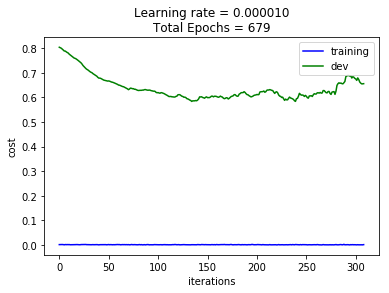

In [60]:
parameters = model(X_train, Y_train, X_dev, Y_dev,
                   learning_rate=0.00001,
                   num_epochs=1000,
                   minibatch_size=512,
                   save_session_path='train/dataset-1024-3/cnn7_lr-0.0005_mbs-128/',
                   model_file='model',
                   restore_session=True,
                   save_session_interval=10,
                   nn_key='cnn7')

# Prediction and restoring saved model

In [18]:
def predict(X_test, session_path, model_file, Y_test_onehot=None):

    tf.reset_default_graph()

    checkpoint_path = session_path
    model_path = session_path + model_file

    with tf.Session() as sess:
        loader = tf.train.import_meta_graph(model_path)
        loader.restore(sess, tf.train.latest_checkpoint(checkpoint_path))

        graph = tf.get_default_graph()

        X = graph.get_tensor_by_name('X:0')
        Y = graph.get_tensor_by_name('Y:0')
        is_train = graph.get_tensor_by_name('is_train:0')

        Y_hat = graph.get_tensor_by_name('softmax_output:0')

        predict_op = tf.argmax(Y_hat, 1)

        y_hat_test = predict_op.eval({X: X_test, is_train: False})
        
        # print the accuracy of the test set if the labels are provided
        if (Y_test_onehot is not None):
            y_test = np.argmax(Y_test_onehot, 1)
            print('Accuracy: %f' % (y_hat_test == y_test).mean())
        

    return y_hat_test


In [19]:
def predict_voting(X_test_voting, session_path, model_file):

    tf.reset_default_graph()

    checkpoint_path = session_path
    model_path = session_path + model_file
    
    y_hat_test_voting = []

    with tf.Session() as sess:
        loader = tf.train.import_meta_graph(model_path)
        loader.restore(sess, tf.train.latest_checkpoint(checkpoint_path))

        graph = tf.get_default_graph()

        X = graph.get_tensor_by_name('X:0')
        is_train = graph.get_tensor_by_name('is_train:0')

        Y_hat = graph.get_tensor_by_name('softmax_output:0')

        predict_op = tf.argmax(Y_hat, 1)
        
        classname, idx, counts = tf.unique_with_counts(predict_op)
        predict_voting_op = tf.gather(classname, tf.argmax(counts))

        # no. of training examples with the original feature size
        m = X_test_voting.shape[0]
        
        # no. of split training examples of each original example
        m_each = X_test_voting.shape[1]
        
        for ex in range(m):
            x_test_voting = make_dimensions_compatible(X_test_voting[ex])
            pred = predict_voting_op.eval({X: x_test_voting, is_train: False})
            
            y_hat_test_voting.append(pred)

    return y_hat_test_voting

In [63]:
predictions = predict(X_dev, 'train/dataset-1024-3/cnn7_lr-0.0005_mbs-128/', 'model.meta', Y_test_onehot=Y_dev)

print(predictions)
print(np.argmax(Y_test, 1))

INFO:tensorflow:Restoring parameters from train/dataset-1024-3/cnn7_lr-0.0005_mbs-128/model
Accuracy: 0.937143
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 0 2 2 2 2 1 2
 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


### Read test data for voting accuracy

In [62]:
testfile = dataset_relative_path + 'testset_voting_1024.h5'
session_path = 'train/dataset-1024-3/cnn7_lr-0.0005_mbs-128/'
model_file = 'model.meta'

with h5.File(testfile, 'r') as testfile:
    X_test_voting = testfile['X']
    X_test_voting = np.array(X_test_voting) / 1000
    y_test_voting = np.array(testfile['Y'])
    
    y_hat_test_voting = predict_voting(X_test_voting, session_path, model_file)
    
    print("Accuracy with voting: %f" % (y_test_voting == y_hat_test_voting).mean())
    

INFO:tensorflow:Restoring parameters from train/dataset-1024-3/cnn7_lr-0.0005_mbs-128/model
Accuracy with voting: 1.000000


In [23]:
print(y_hat_test_voting)
print(y_test_voting)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2.]


In [ ]:
print(np.argmax(Y_dev, 1))